In [10]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Flatten
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
df_ongc = yf.Ticker('ONGC.NS')
df_ongc = df_ongc.history(period='1d', start = '2010-01-01', end='2024-01-01')
df_ongc.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00+05:30,104.865217,106.290737,104.776119,105.796265,1905762,0.0,0.0
2010-01-05 00:00:00+05:30,106.210570,108.250853,105.947738,107.649460,4657392,0.0,0.0
2010-01-06 00:00:00+05:30,107.992479,109.320002,107.555912,109.008171,4203690,0.0,0.0
2010-01-07 00:00:00+05:30,108.785432,110.023857,107.805385,109.123993,6394536,0.0,0.0
2010-01-08 00:00:00+05:30,109.141813,110.353508,107.805383,108.313225,5678652,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

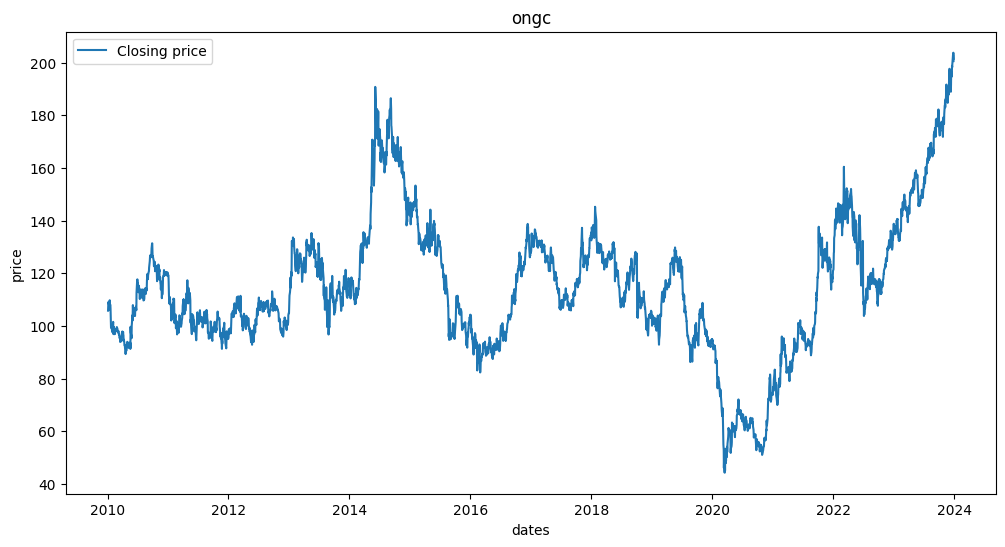

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df_ongc.index, df_ongc['Close'], label ='Closing price')
plt.title('ongc')
plt.xlabel('dates')
plt.ylabel('price')
plt.legend()
plt.show

In [40]:
series = df_ongc['Close'].values

In [42]:
#prepare window dataset
window_size = 20
batch_size = 128
shuffle_buffer = 10000

X,y = [],[]

for i in range(window_size, len(series)):
  X.append(series[i-window_size:i])
  y.append(series[i])

X = np.array(X)
y = np.array(y)

In [43]:
split = int(len(X)*0.8)

X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

train_data = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_data = train_data.cache().batch(batch_size).shuffle(shuffle_buffer).prefetch(tf.data.experimental.AUTOTUNE)

In [47]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=[None,1]),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

model.compile(loss='mse', optimizer='adam')

history = model.fit(train_data, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 10816.8379
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 10480.5264
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 10609.0889
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 9439.0215
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 10136.6982
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 9264.8330
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 9358.7754
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 9187.0713
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 9924.8721
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 10117.7549
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 9816.2998
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 8578.4463
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 7929.6025
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 8806.9434
Epoch 15/100
22/22 ━━━

In [48]:
forecast = model.predict(X_val)

mae = mean_absolute_error(y_val, forecast)
mse = mean_squared_error(y_val, forecast)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [49]:
mae, mse

(44.44277804178962, 2707.7106405317563)

In [23]:
df_ongc[split:]['Close']

,Close
Date,
2022-03-02 00:00:00+05:30,139.815430
2022-03-03 00:00:00+05:30,146.121933
2022-03-04 00:00:00+05:30,141.788895
2022-03-07 00:00:00+05:30,160.408066
2022-03-08 00:00:00+05:30,153.672531
...,...
2023-12-22 00:00:00+05:30,199.458740
2023-12-26 00:00:00+05:30,202.783890
2023-12-27 00:00:00+05:30,201.023514


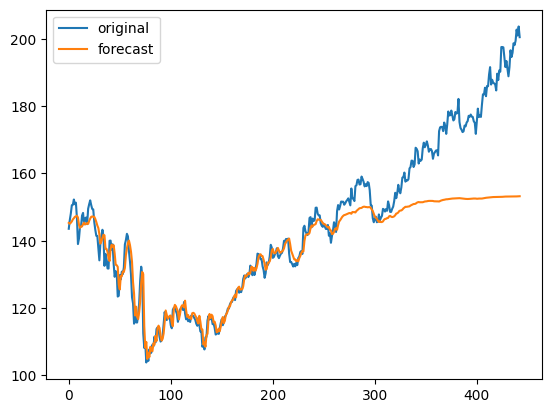

In [24]:
plt.plot(y_val, label='original')
plt.plot(forecast, label='forecast')
plt.legend()
plt.show()